In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')

In [14]:
print(train.shape)
train.sample(5)

(18359, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13770,10348,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,18,50-99,Pvt Ltd,>4,28,0
13109,20916,city_116,0.743,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,5000-9999,Pvt Ltd,1,64,0
17972,26015,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,9,100-500,Pvt Ltd,2,45,0
17146,10593,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Funded Startup,1,32,0
16525,8461,city_103,0.920,NaN,Has relevent experience,Part time course,Masters,STEM,11,100-500,Funded Startup,2,100,0


In [15]:
# ordinal columns
ordinal = ["education_level", "experience", "company_size", "last_new_job", "city_development_index"]
# binary columns
binary = ["relevent_experience"]
#numeric columns
numeric = ["training_hours"]
# categorical_columns
nominal = ["city", "gender", "enrolled_university", "major_discipline", "company_type"]

In [17]:
train["experience"].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

In [46]:
np.array(set(train["education_level"].tolist()))

array({nan, 'High School', 'Masters', 'Phd', 'Primary School', 'Graduate'},
      dtype=object)

In [37]:
education_dict = {"Primary School": 0, "High School": 1, "Graduate":2, "Masters":3, "Phd": 4}
experience_dict = {'8':8, '9':9, '5':5, '14':14, '6':6, '1':1, '3':3, '13':13, '11':11, '7':7, '4':4,
                '<1':0, '>20':21, '15':15, '12':12, '19':19, '18':18, '2':2, '20':20, '10':10, '17':17, '16':16}
company_dict = {'<10':0, '100-500':3, '5000-9999':6, '500-999':4, '10/49':1, '1000-4999':5,
                '50-99':2, '10000+':7}
job_dict = {'never':0, '2':2, '>4':5, '4':4, '1':1, '3':3}

cdi = sorted(list(set(train["city_development_index"].tolist())))
cdi_dict = {}
for idx, num in enumerate(cdi):
    cdi_dict[num] = idx

In [45]:
print(train.shape)
train.isnull().sum()

(18359, 14)


enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [40]:
train.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6587,14890,city_65,0.802,Male,Has relevent experience,no_enrollment,Masters,Business Degree,11,NaN,NaN,2,35,0
3529,11720,city_28,0.939,Male,No relevent experience,no_enrollment,Masters,STEM,19,5000-9999,Pvt Ltd,>4,22,0
10434,24383,city_114,0.926,NaN,No relevent experience,NaN,High School,NaN,3,100-500,Public Sector,2,65,0
921,19395,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,1,126,0
6013,9640,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,143,0
7545,8084,city_45,0.890,Male,Has relevent experience,Full time course,Graduate,STEM,2,<10,Early Stage Startup,1,21,0
4160,20733,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,10,10000+,Pvt Ltd,>4,47,0
12219,7075,city_41,0.827,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,<10,Pvt Ltd,2,33,1
1617,24900,city_21,0.624,NaN,No relevent experience,Full time course,Masters,STEM,<1,NaN,NaN,never,55,0
17219,29616,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,54,0


In [44]:
for i in nominal:
    print(i, train[i].nunique())

city 123
gender 3
enrolled_university 3
major_discipline 6
company_type 6


In [51]:
train.target.unique()

array([0, 1])

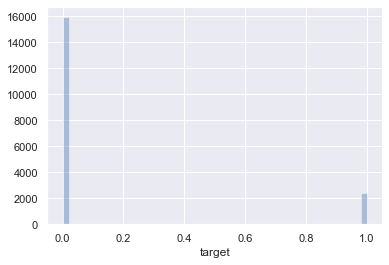

In [52]:
sns.distplot(train.target, kde = False)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me